In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Create a practice set of random latitude and longitude combinations.
x = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
y = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]
coordinates = zip(x, y)

In [4]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

25.12903645 -67.59741259
25.92017388 11.09532135
26.62509167 74.84233102
-59.98969384 -76.89176677
37.30571269 -61.13376282


In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

taolanaro mg
havelock us
port alfred za
busselton au
kodiak us
kloulklubed pw
busselton au
shache cn
cape town za
ponta delgada pt
bethel us
vaini to
dakar sn
carnarvon au
chokurdakh ru
east london za
haverfordwest gb
thompson ca
airai pw
belushya guba ru
new norfolk au
atuona pf
kahului us
cubara co
krasnovishersk ru
iqaluit ca
new norfolk au
saryagash kz
busselton au
smolenka ru
dikson ru
busselton au
port alfred za
kruisfontein za
kamenskoye ru
logumkloster dk
kloulklubed pw
hithadhoo mv
ourossogui sn
narsaq gl
kidal ml
arraial do cabo br
chuy uy
new norfolk au
bengkulu id
lalomanu ws
qaanaaq gl
port alfred za
san lawrenz mt
hobart au
punta arenas cl
campbellton ca
byron bay au
puerto carreno co
yellowknife ca
ushuaia ar
jamestown sh
buraydah sa
saskylakh ru
arraial do cabo br
kaduqli sd
manuk mangkaw ph
poum nc
alice springs au
thompson ca
pathein mm
hobart au
barentsburg sj
riwaka nz
mahon es
vanimo pg
butaritari ki
codrington ag
kudat my
baykit ru
yershov ru
bredasdorp za
thompso

houma us
cap malheureux mu
ajdabiya ly
ilulissat gl
torello es
dalby au
suntar ru
santa cruz cr
touros br
upernavik gl
nyurba ru
tilichiki ru
avarua ck
yulara au
keningau my
hobart au
narsaq gl
kapaa us
mataura pf
kapaa us
cesis lv
busselton au
porto-vecchio fr
miquelon pm
rikitea pf
ushuaia ar
guerrero negro mx
morwell au
ushuaia ar
tiksi ru
attawapiskat ca
port hardy ca
port elizabeth za
hermanus za
rikitea pf
bredasdorp za
busselton au
hobart au
aborlan ph
katsuura jp
nchelenge zm
lexington us
cherskiy ru
port alfred za
caravelas br
vaini to
oriximina br
comodoro rivadavia ar
saleaula ws
grindavik is
vaini to
zharkent kz
cherskiy ru
saint-philippe re
hobart au
busselton au
avarua ck
hermanus za
chuy uy
plettenberg bay za
alotau pg
verkhovazhye ru
biak id
ostrovnoy ru
bambous virieux mu
fortuna us
bojnurd ir
rikitea pf
albany au
constitucion mx
dikson ru
kuala lipis my
ushuaia ar
jizan sa
nguiu au
arica cl
ushuaia ar
kuldiga lv
aklavik ca
bluff nz
grindavik is
trat th
faanui pf
avaru

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

604

In [8]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [10]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [11]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [12]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 2 of Set 1 | havelock
Processing Record 3 of Set 1 | port alfred
Processing Record 4 of Set 1 | busselton
Processing Record 5 of Set 1 | kodiak
Processing Record 6 of Set 1 | kloulklubed
Processing Record 7 of Set 1 | shache
Processing Record 8 of Set 1 | cape town
Processing Record 9 of Set 1 | ponta delgada
Processing Record 10 of Set 1 | bethel
Processing Record 11 of Set 1 | vaini
Processing Record 12 of Set 1 | dakar
Processing Record 13 of Set 1 | carnarvon
Processing Record 14 of Set 1 | chokurdakh
Processing Record 15 of Set 1 | east london
Processing Record 16 of Set 1 | haverfordwest
Processing Record 17 of Set 1 | thompson
Processing Record 18 of Set 1 | airai
Processing Record 19 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 20 of Set 1 | new norfolk
Processing Record 21 of Set 1 | atuona
Processing Record 22 of Set 1 | kahului
Processing Record 23 of Set 1 | cuba

KeyboardInterrupt: 

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Havelock,34.8791,-76.9013,56.01,55,0,3.00,US,2021-12-12 21:17:15
1,Port Alfred,-33.5906,26.8910,70.74,95,100,13.15,ZA,2021-12-12 21:17:15
2,Busselton,-33.6500,115.3333,47.05,75,100,8.21,AU,2021-12-12 21:17:16
3,Kodiak,57.7900,-152.4072,11.71,52,1,23.02,US,2021-12-12 21:17:16
4,Kloulklubed,7.0419,134.2556,79.30,80,80,13.62,PW,2021-12-12 21:17:16
5,Shache,38.4167,77.2406,21.85,62,4,3.04,CN,2021-12-12 21:17:17
6,Cape Town,-33.9258,18.4232,66.61,80,20,4.00,ZA,2021-12-12 21:17:17
7,Ponta Delgada,37.7333,-25.6667,56.50,62,20,13.80,PT,2021-12-12 21:17:17
8,Bethel,41.3712,-73.4140,45.99,41,0,7.72,US,2021-12-12 21:17:18
9,Vaini,-21.2000,-175.2000,80.76,89,75,9.22,TO,2021-12-12 21:17:18


In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [17]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1639345267.7186568

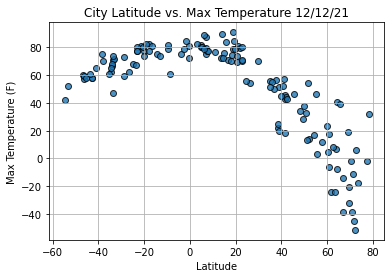

In [18]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

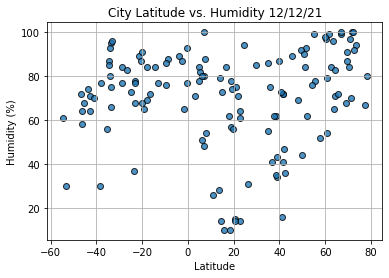

In [19]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

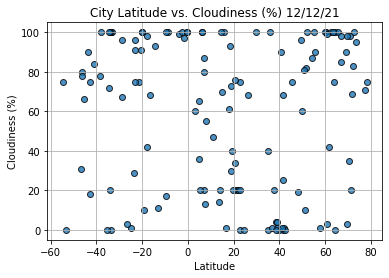

In [20]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()